In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
lead = pd.read_csv("Lead Scoring.csv", encoding='latin-1')


In [3]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead.shape

(9240, 37)

In [6]:
len(lead)

9240

In [7]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
lead.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [9]:
lead["Prospect ID"].duplicated().sum()

0

<Axes: xlabel='Converted', ylabel='count'>

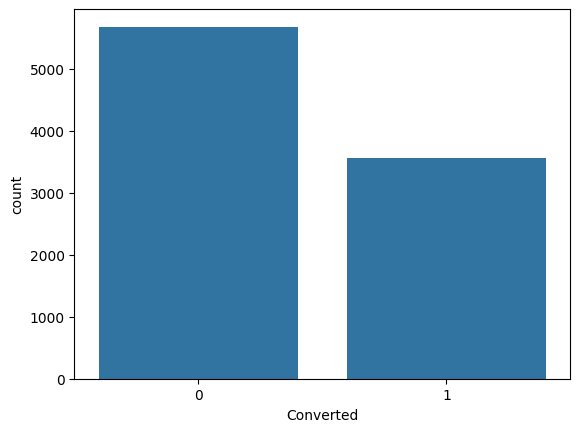

In [10]:
sns.countplot(data=lead, x='Converted')


In [11]:
lead.isna().sum().sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [12]:
for i in lead.columns:
    if lead[i].isna().sum()>3000:
       lead.drop(i,axis =1,inplace =True)
    

In [13]:
lead["Lead Source"].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [14]:
#to fill missing values
lead["Lead Source"].fillna("Google",inplace =True)
#In 'Lead Source' column, we fill missing values with the most frequent one

In [15]:
lead["Lead Source"] = lead["Lead Source"].str.replace("google","Google")

In [16]:
lead["Lead Source"].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

<Axes: ylabel='Lead Source'>

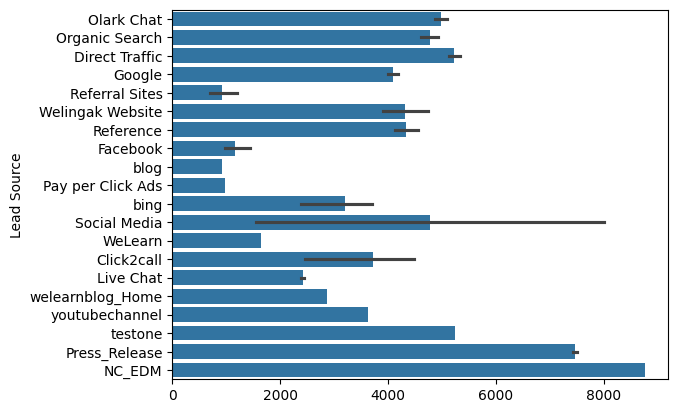

In [17]:
sns.barplot(lead["Lead Source"])

In [18]:
#Lasd activity

lead["Last Activity"].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [19]:
lead["Last Activity"].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

If we don't have information about last activity of leads, let's simply fill that rows with "Other"



In [20]:
lead["Last Activity"].fillna("other",inplace=True)

<Axes: xlabel='count', ylabel='Last Activity'>

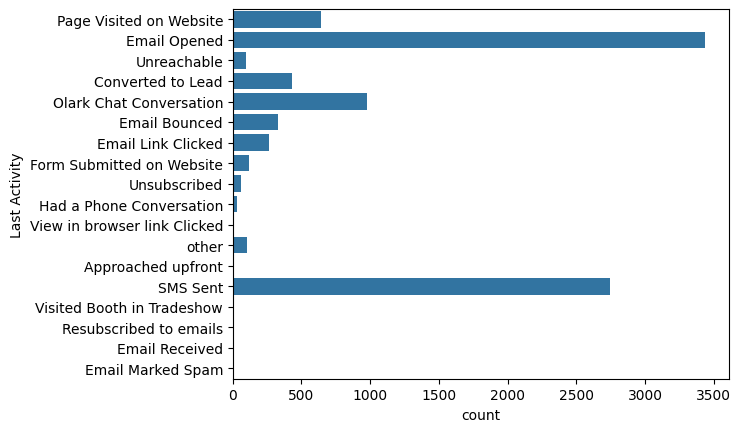

In [21]:
sns.countplot(data=lead['Last Activity'])


In [22]:
#city
lead["City"].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

Here some rows named select,those leads havent chosen the city ,and we also have the missing values which we used to fill with "select"

In [23]:
lead["City"].fillna("Select",inplace = True)

<Axes: xlabel='count', ylabel='City'>

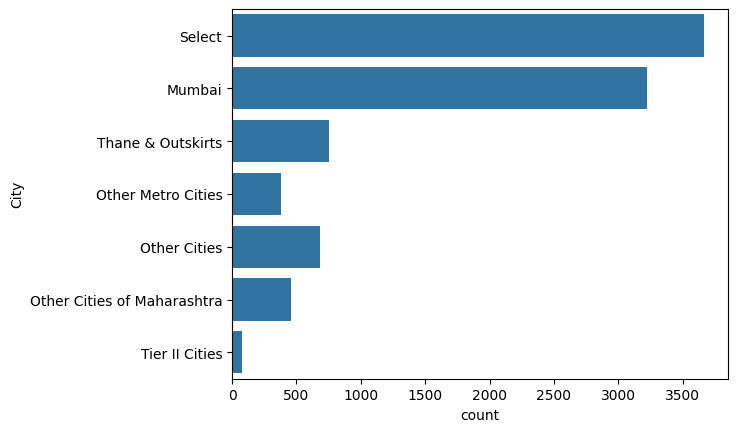

In [24]:
sns.countplot(data=lead['City'])


In [25]:
#Specialization

lead["Specialization"].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

We see some rows are named "Select". Those leads haven'y chosen the specialization, and we also fill missing values with "Select".

In [26]:
lead["Specialization"].fillna("Select",inplace=True)

<Axes: xlabel='count', ylabel='Specialization'>

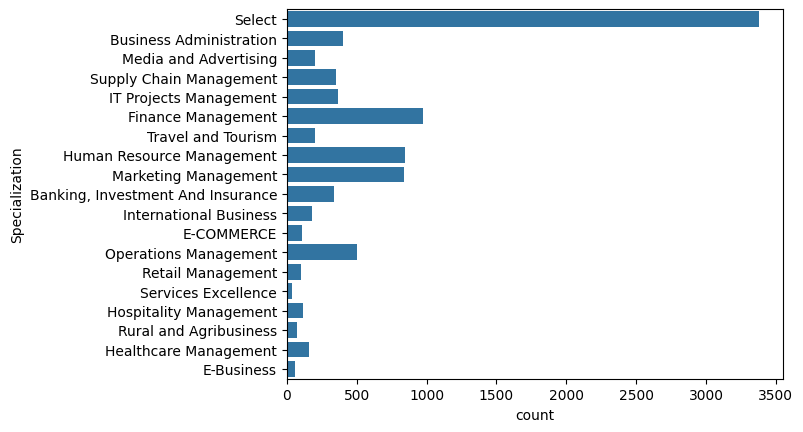

In [27]:
sns.countplot(data=lead['Specialization'])


In [28]:
#How did you hear about X education

lead["How did you hear about X Education"].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

We see some rows are named "Select". Those leads haven'y chosen the How did you hear about X Education, and we also fill missing values with "Select".

In [29]:
lead['How did you hear about X Education'].fillna('Select', inplace=True)


In [30]:
#Country

lead["Country"].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [31]:
lead[(lead["Country"].isna())&(lead["City"].isna()==False)]["City"].unique()

array(['Select', 'Thane & Outskirts', 'Other Cities of Maharashtra',
       'Mumbai', 'Other Cities', 'Other Metro Cities', 'Tier II Cities'],
      dtype=object)

We check what values city column have when Country column's variables are missing.



In [32]:
lead.loc[(lead["Country"].isna())&(lead["City"]=="Mumbai"),"Country"]="India"
          
lead.loc[(lead["Country"].isna())&(lead["City"]=="Other Cities of Maharastra"),"Country"]="India"
       
lead["Country"].fillna("Unknown",inplace=True)          

<Axes: ylabel='count'>

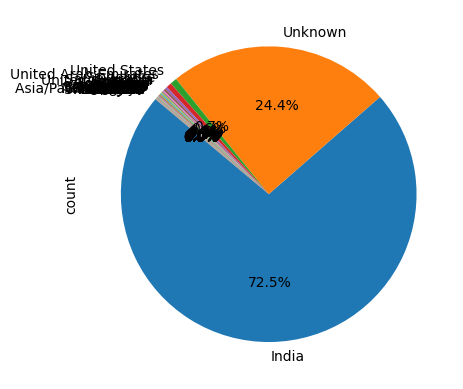

In [33]:
lead["Country"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)


Mumbai and Maharashtra are in India, we can fill that missing rows with India. But for rest we will fill with "unknown".



In [34]:
#What is your current occupation

lead["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [35]:
lead['What is your current occupation'].fillna('Other', inplace=True)


In [36]:
#Lead Profile
lead['Lead Profile'].value_counts()


Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [37]:
lead['Lead Profile'].fillna('Select', inplace=True)


In [38]:
#What matters most to you in choosing a course
lead['What matters most to you in choosing a course'].value_counts()


What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [39]:
lead['What matters most to you in choosing a course'].fillna('Other', inplace=True)


In [40]:
#TotalVisits

lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [41]:
lead['TotalVisits'].fillna(3, inplace=True)

In [42]:
#Page Views Per Visit
lead['Page Views Per Visit'].fillna(2, inplace=True)


Let's make all column names follow the same nameing convention

In [43]:
lead.columns = lead.columns.str.lower().str.replace(' ','_')
string_columns = list(lead.dtypes[lead.dtypes=='Object'].index)

for col in string_columns:
    lead[col] = lead[col].str.lower().str.replace(' ', '_')

# Split our data into trian and test datasets

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train_full,test_X = train_test_split(lead,test_size = 0.2,random_state = 1)

In [46]:
train_X,val_X=train_test_split(train_full,test_size=0.2,random_state=1)

In [47]:
train_y = train_X['converted'].values.reshape(-1,1)
val_y = val_X['converted'].values.reshape(-1,1)
test_y = test_X['converted'].values.reshape(-1,1)

In [48]:
print(f'{len(train_y)}\n{len(val_y)}\n{len(test_y)}')

5913
1479
1848


In [49]:
train_X.columns = train_X.columns.str.replace('-', '')
val_X.columns = val_X.columns.str.replace('-', '')
test_X.columns = test_X.columns.str.replace('-', '')

print("Column names in train_X:", train_X.columns)
print("Column names in val_X:", val_X.columns)
print("Column names in test_X:", test_X.columns)



Column names in train_X: Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')
Column names in val_X: Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits

In [50]:
train_y = train_X['converted']
print(f"Length of train_y: {len(train_y)}")
print(f"Length of val_X: {len(val_X)}")
print(f"Length of train_X: {len(train_X)}")


Length of train_y: 5913
Length of val_X: 1479
Length of train_X: 5913


# Explotary Data Analysis

In [51]:
categorical_df = lead.select_dtypes(include='object')
categorical_df.drop(['prospect_id'], axis=1, inplace=True)
categorical = list(categorical_df.columns)

numerical_df = lead.select_dtypes(exclude='object')
numerical_df.drop(['lead_number', 'converted'], axis=1, inplace=True)
numerical = list(numerical_df)

In [52]:
train_X[categorical].nunique().to_frame('nunique').sort_values('nunique', ascending=False)

,nunique
country,36
lead_source,19
specialization,19
last_activity,17
last_notable_activity,15
how_did_you_hear_about_x_education,10
city,7
lead_profile,6
what_is_your_current_occupation,6
lead_origin,5


In [53]:
train_X['converted'].value_counts()

converted
0    3629
1    2284
Name: count, dtype: int64

In our data, 2832 leads converted their contract and 4560 leads didn't convert. In order to find convering rate we can divide 2831 by 4560 or use mean() funtion, which will do the same thing.

In [54]:
train_X[categorical].nunique().to_frame('nunique').sort_values('nunique', ascending=False)

,nunique
country,36
lead_source,19
specialization,19
last_activity,17
last_notable_activity,15
how_did_you_hear_about_x_education,10
city,7
lead_profile,6
what_is_your_current_occupation,6
lead_origin,5


In [55]:
print(train_X.columns)



Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')


In [56]:
train_X["converted"].value_counts()

converted
0    3629
1    2284
Name: count, dtype: int64

<Axes: xlabel='converted', ylabel='count'>

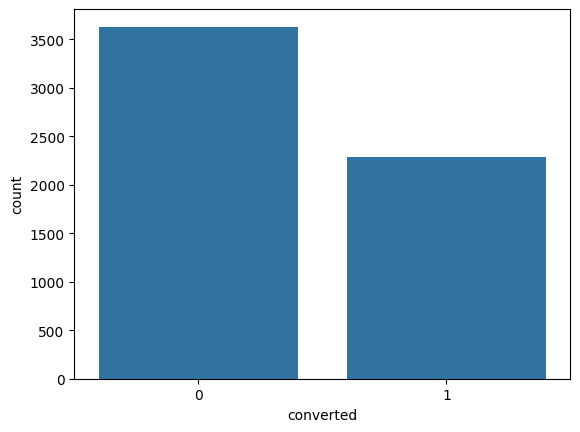

In [57]:
sns.countplot(data=train_X, x="converted")


In [58]:
# Calculate conversion rate using mean function
conversion_rate = train_X['converted'].mean()

# Print the conversion rate
print("Conversion rate:", conversion_rate)


Conversion rate: 0.38626754608489766


In [59]:
2832/2832+4560

4561.0

In our data, 2832 leads converted their contract and 4560 leads didn't convert. In order to find convering rate we can divide 2831 by 4560 or use mean() funtion, which will do the same thing.

In [60]:
global_mean = round(train_X['converted'].mean(),3)
print(f'Only {global_mean*100}% of leads have been successfully converted.')

Only 38.6% of leads have been successfully converted.


If we choose specific column and find converted mean, we will know converting rate of that group. We can do it by groupby function.

If difference between global converting rate and that column's converting rate is positive, it means that this group of leads convert their contracts more than general. If it's negative, they convert less than general. And if difference between the rates is the small, the value is not important when predicting converting because this group of leads is not really different from rest of leads.

Reliability = global rate / group rate. If reliability is lower than 1, the group has lower reliability. And if group reliability is around 1, it's not different from global rate. And if it's above 1, it means that it has more reability that leads will convert their contracts.

In [61]:
grouped_train = train_X.groupby('what_is_your_current_occupation').converted.agg(['mean'])
grouped_train['diff'] = global_mean - grouped_train['mean']
grouped_train['reliability'] = grouped_train['mean']/global_mean
grouped_train

,mean,diff,reliability
what_is_your_current_occupation,,,
Businessman,0.400000,-0.014000,1.036269
Housewife,1.000000,-0.614000,2.590674
Other,0.147387,0.238613,0.381832
Student,0.377778,0.008222,0.978699
Unemployed,0.431573,-0.045573,1.118065
Working Professional,0.924107,-0.538107,2.394060


Housewife and Working Professional categories are most likely to be converted. There are sharp differences between values.



In [62]:
def converted_stat(column):
    data_group = train_X.groupby(column).converted.agg(['mean'])
    data_group['diff'] = data_group['mean'] - global_mean
    data_group['reliability'] = data_group['mean']/global_mean
    return data_group

In [63]:
converted_stat('what_matters_most_to_you_in_choosing_a_course')


,mean,diff,reliability
what_matters_most_to_you_in_choosing_a_course,,,
Better Career Prospects,0.485245,0.099245,1.257112
Other,0.143191,-0.242809,0.370961


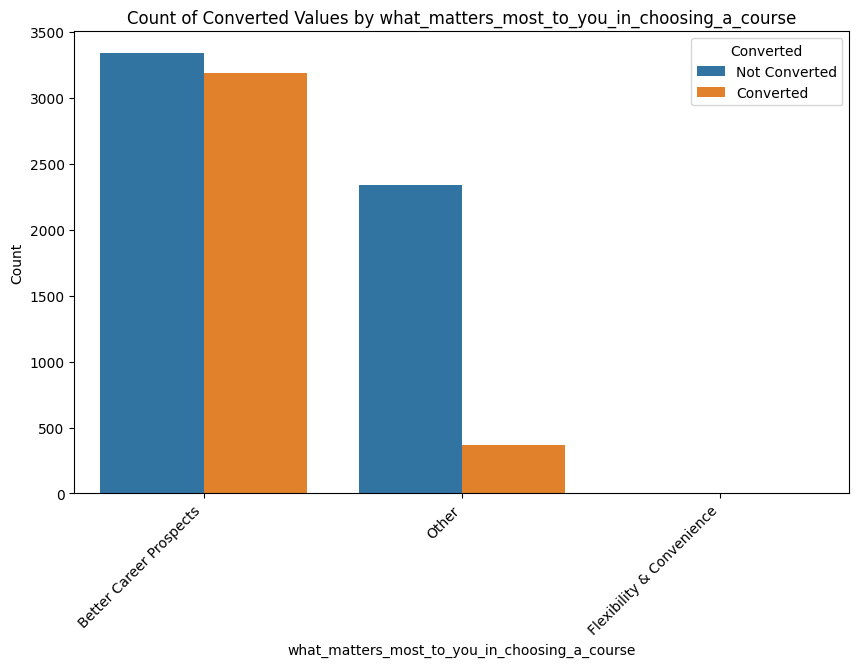

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

def converted_stat(column_name):
    # Plotting the count of converted values based on the specified column
    plt.figure(figsize=(10, 6))
    sns.countplot(data=lead, x=column_name, hue='converted')
    plt.title(f'Count of Converted Values by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.legend(title='Converted', labels=['Not Converted', 'Converted'])
    plt.show()

# Call the function with the specified column name
converted_stat('what_matters_most_to_you_in_choosing_a_course')


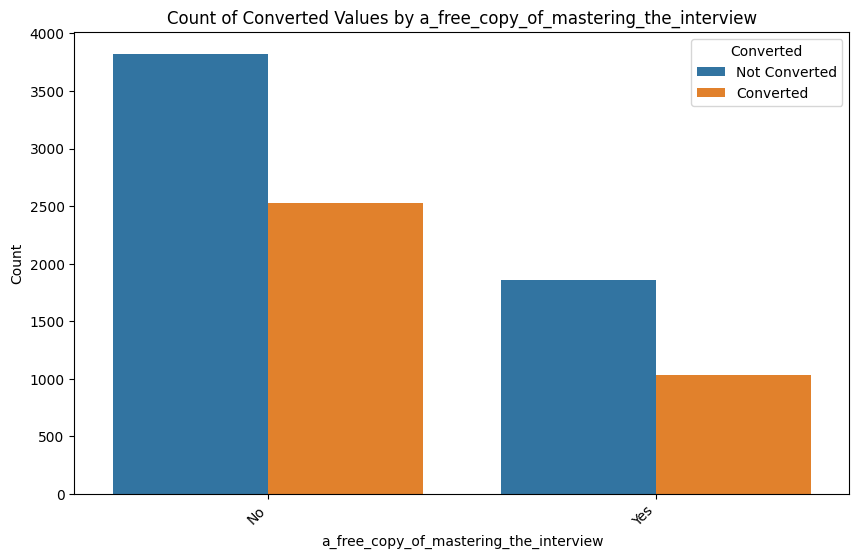

In [65]:
converted_stat('a_free_copy_of_mastering_the_interview')


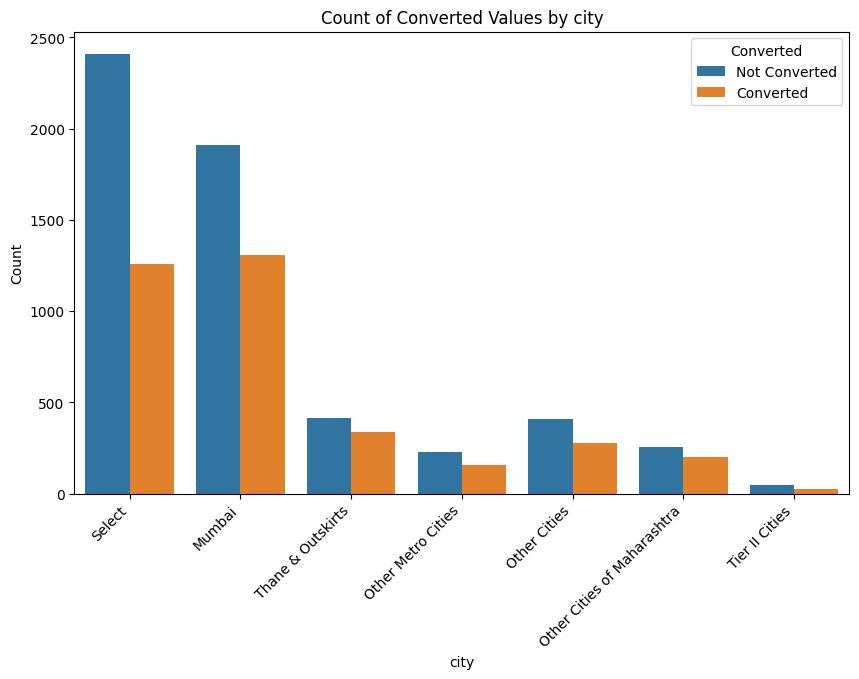

In [66]:
converted_stat('city')

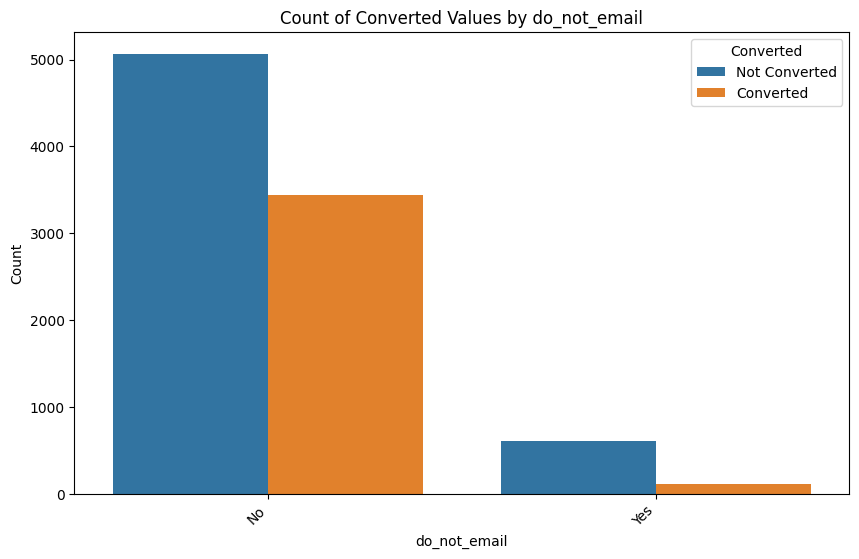

In [67]:
converted_stat('do_not_email')

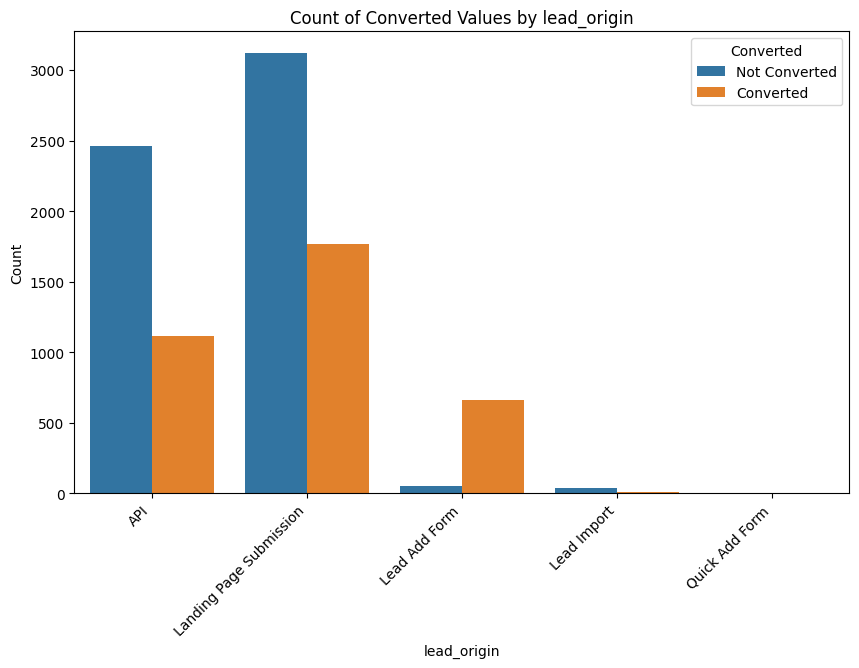

In [68]:
converted_stat('lead_origin')

# Dependency between categorical variables and target variable



In [69]:

lead.columns = lead.columns.str.replace('-', '')

print(lead.columns)


Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')


In [70]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, lead['converted'])

data_mi = lead[categorical].apply(calculate_mi)
data_mi = data_mi.sort_values(ascending=False).to_frame(name='Mi')
data_mi


,Mi
what_is_your_current_occupation,0.095197
last_activity,0.088512
lead_profile,0.082869
last_notable_activity,0.073860
lead_source,0.061560
what_matters_most_to_you_in_choosing_a_course,0.060058
lead_origin,0.056251
specialization,0.014624
do_not_email,0.010327
country,0.003023


In [71]:
print(lead.columns)  

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')


# Correcaltion Coefficient

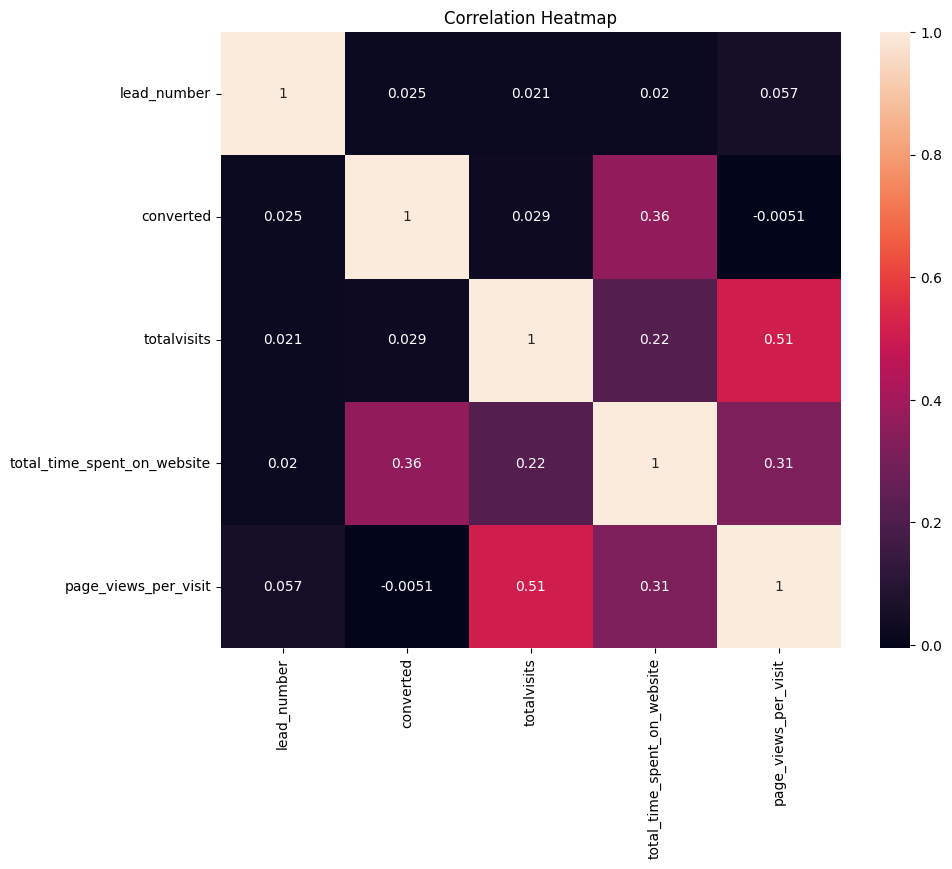

In [72]:
# Identify and handle non-numerical values
non_numeric_cols = lead.select_dtypes(exclude=['float64', 'int64']).columns
lead_numeric = lead.drop(columns=non_numeric_cols)

# Convert categorical columns to numerical format using one-hot encoding
lead_numeric = pd.get_dummies(lead_numeric)

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(lead_numeric.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [73]:
lead[numerical].corrwith(lead['converted']).to_frame('Correlations')

,Correlations
totalvisits,0.029119
total_time_spent_on_website,0.362483
page_views_per_visit,-0.005068


Totalvisits and total_time_spent_on_website has positive correlation, the more leads visit website and the more time they spent on website, the more leads are converted. But page_views_per_visit has negative correlation, the more number of pages on the website are viewed during the visits, the less they are converted.

We choose categorical variables with me score more than 0.01.

lead number ,totalvisits and total_time_spent_on_website has positive correlation, the more leads visit website and the more time they spent on website, the more leads are converted. But page_views_per_visit has negative correlation, the more number of pages on the website are viewed during the visits, the less they are converted.

choose categorical variables with me score more than 0.01.

# Vectorizing variables

In [74]:
cat = list(data_mi.iloc[0:9,:].index)

In [75]:
cat

['what_is_your_current_occupation',
 'last_activity',
 'lead_profile',
 'last_notable_activity',
 'lead_source',
 'what_matters_most_to_you_in_choosing_a_course',
 'lead_origin',
 'specialization',
 'do_not_email']

In [76]:
data_mi

,Mi
what_is_your_current_occupation,0.095197
last_activity,0.088512
lead_profile,0.082869
last_notable_activity,0.073860
lead_source,0.061560
what_matters_most_to_you_in_choosing_a_course,0.060058
lead_origin,0.056251
specialization,0.014624
do_not_email,0.010327
country,0.003023


In [77]:
# Extract the 5th to 10th rows from data_mi
subset_data_mi = data_mi.iloc[4:15:]

# Display the subset
print(subset_data_mi)


                                                     Mi
lead_source                                    0.061560
what_matters_most_to_you_in_choosing_a_course  0.060058
lead_origin                                    0.056251
specialization                                 0.014624
do_not_email                                   0.010327
country                                        0.003023
city                                           0.003002
how_did_you_hear_about_x_education             0.001446
a_free_copy_of_mastering_the_interview         0.000797
do_not_call                                    0.000206
through_recommendations                        0.000168


In [78]:
train_dict = train_X[cat+numerical].to_dict(orient='records')


In [79]:
train_dict[0]

{'what_is_your_current_occupation': 'Unemployed',
 'last_activity': 'SMS Sent',
 'lead_profile': 'Select',
 'last_notable_activity': 'SMS Sent',
 'lead_source': 'Direct Traffic',
 'what_matters_most_to_you_in_choosing_a_course': 'Better Career Prospects',
 'lead_origin': 'Landing Page Submission',
 'specialization': 'Supply Chain Management',
 'do_not_email': 'No',
 'totalvisits': 4.0,
 'total_time_spent_on_website': 1376,
 'page_views_per_visit': 4.0}

Column names in data frame is key and rows are values.



In [80]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [81]:
len(X_train[0])


94

We vectorized rows into array, to see the column names we can use get_feature_names() funtion.



In [82]:
#dv.get_feature_names()
feature_names = dv.get_feature_names_out()
print(feature_names)


['do_not_email=No' 'do_not_email=Yes' 'last_activity=Approached upfront'
 'last_activity=Converted to Lead' 'last_activity=Email Bounced'
 'last_activity=Email Link Clicked' 'last_activity=Email Marked Spam'
 'last_activity=Email Opened' 'last_activity=Email Received'
 'last_activity=Form Submitted on Website'
 'last_activity=Had a Phone Conversation'
 'last_activity=Olark Chat Conversation'
 'last_activity=Page Visited on Website'
 'last_activity=Resubscribed to emails' 'last_activity=SMS Sent'
 'last_activity=Unreachable' 'last_activity=Unsubscribed'
 'last_activity=View in browser link Clicked' 'last_activity=other'
 'last_notable_activity=Email Bounced'
 'last_notable_activity=Email Link Clicked'
 'last_notable_activity=Email Marked Spam'
 'last_notable_activity=Email Opened'
 'last_notable_activity=Email Received'
 'last_notable_activity=Form Submitted on Website'
 'last_notable_activity=Had a Phone Conversation'
 'last_notable_activity=Modified'
 'last_notable_activity=Olark Chat

# Logistic regression¶


To predict leads will be converted or not we will use logistic regression model



In [83]:
val_dict = val_X[cat+numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [84]:
len(X_val[0])

94

In [85]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, train_y)

LogisticRegression(random_state=1, solver='liblinear')

In [86]:
preds = model.predict_proba(X_val)[:,1]

In [92]:
preds[:9]

array([0.02997078, 0.41319484, 0.83319145, 0.03645908, 0.95035384,
       0.06270085, 0.06830072, 0.02997078, 0.24296837])

In [88]:
pred = (preds>0.5).astype(int).reshape(-1,1)

In [93]:
pred[:9]

array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [90]:
val_y = val_X['converted'].values.reshape(-1,1)


In [91]:
(pred==val_y).mean()


0.8242055442866801

so,here we see that 82% of our prediction is right

# Accuracy

In [169]:
from sklearn.metrics import accuracy_score

In [170]:
thresholds = np.linspace(0,1,11)

for i in thresholds:
    churn = preds>=i
    acc = accuracy_score(val_y,churn)
    print(f"{round(i,1)} {round(acc,3)}")

0.0 0.371
0.1 0.674
0.2 0.786
0.3 0.824
0.4 0.837
0.5 0.824
0.6 0.811
0.7 0.795
0.8 0.771
0.9 0.729
1.0 0.629


In [171]:
thresholds = np.linspace(0,1,21)
accs = []

for i in thresholds:
    churn = preds>=i
    acc = accuracy_score(val_y,churn)
    accs.append(accs)

# Confusion Table

In [172]:
t = 0.4

predict_convert = (preds>=t).reshape(-1,1)
predict_no_convert = (preds<t).reshape(-1,1)

actual_convert = (val_y==1)
actual_no_convert = (val_y==0)

true_positive = (predict_convert & actual_convert).sum()
true_negative = (predict_no_convert & actual_no_convert).sum()

false_positive = (predict_convert & actual_no_convert).sum()
false_negative = (predict_no_convert & actual_convert).sum()

In [173]:
confussion_table = np.array([[true_negative, false_positive],[false_negative,true_positive]])
confussion_table

array([[804, 127],
       [114, 434]])

In [174]:
confussion_table/confussion_table.sum()

array([[0.54361055, 0.08586883],
       [0.07707911, 0.29344151]])

# Precision and recall

In [175]:
P = true_positive/(true_positive+false_positive)
print(f'Percent of correct predictions among leads predicted as converted is {round(P,2)*100}%')

Percent of correct predictions among leads predicted as converted is 77.0%


In [176]:
R = true_positive/(true_positive+false_negative)
print(f'Percent of correct predictions among actual converteds is {round(R,2)*100}%')

Percent of correct predictions among actual converteds is 79.0%


True positive rate and false positive rate

In [177]:
tpr = true_positive/(true_positive+false_negative)
fpr = false_positive/(true_negative+false_positive)
print(f'The fraction of true positives among all positive examples: {tpr}\nThe fraction of false positives among all negative examples: {fpr}')

The fraction of true positives among all positive examples: 0.791970802919708
The fraction of false positives among all negative examples: 0.1364124597207304


The fraction of true positives among all converted leads: the larger TPR is, the better, The fraction of false positives among all non-converted leads: the smaller the FPR is, the better.

In [178]:
scores = []

thresholds = np.linspace(0,1,101)

for t in thresholds:
    tp = ((preds>=t).reshape(-1,1)&(val_y==1)).sum()
    fp = ((preds>=t).reshape(-1,1)&(val_y==0)).sum()
    fn = ((preds<t).reshape(-1,1)&(val_y==1)).sum()
    tn = ((preds<t).reshape(-1,1)&(val_y==0)).sum()
    scores.append((t,tp,fp,fn,tn))

In [179]:
df_scores = pd.DataFrame(scores)
df_scores.columns = ['thresholds','tp','fp','fn','tn']
df_scores[::10]

,thresholds,tp,fp,fn,tn
0,0.0,548,931,0,0
10,0.1,532,466,16,465
20,0.2,506,275,42,656
30,0.3,466,179,82,752
40,0.4,434,127,114,804
50,0.5,389,101,159,830
60,0.6,343,75,205,856
70,0.7,299,54,249,877
80,0.8,240,31,308,900
90,0.9,159,12,389,919


In [180]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp+df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp+df_scores.tn)
df_scores[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,548,931,0,0,1.000000,1.000000
10,0.1,532,466,16,465,0.970803,0.500537
20,0.2,506,275,42,656,0.923358,0.295381
30,0.3,466,179,82,752,0.850365,0.192266
40,0.4,434,127,114,804,0.791971,0.136412
50,0.5,389,101,159,830,0.709854,0.108485
60,0.6,343,75,205,856,0.625912,0.080559
70,0.7,299,54,249,877,0.545620,0.058002
80,0.8,240,31,308,900,0.437956,0.033298
90,0.9,159,12,389,919,0.290146,0.012889


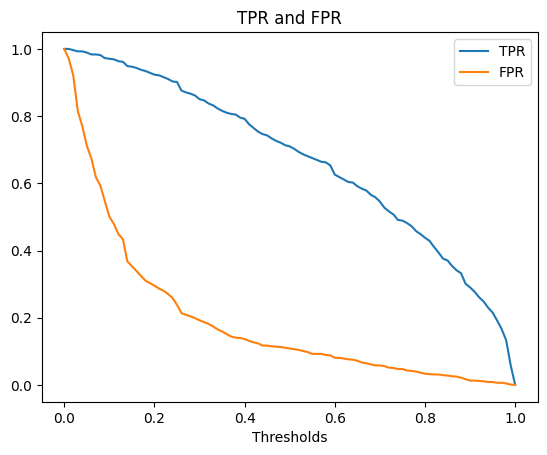

In [181]:
plt.plot(df_scores.thresholds, df_scores.tpr, label='TPR')
plt.plot(df_scores.thresholds, df_scores.fpr, label='FPR')
plt.xlabel('Thresholds')
plt.title('TPR and FPR')
plt.legend()
plt.show()

The TPR and FPR for our model evaluated at different thresholds.

# ROC curve

The ROC curve shows the relationship between the FPR and TPR of a model.



In [182]:
from sklearn.metrics import roc_curve

In [183]:
fpr, tpr, thresholds = roc_curve(val_y, preds.reshape(-1,1))

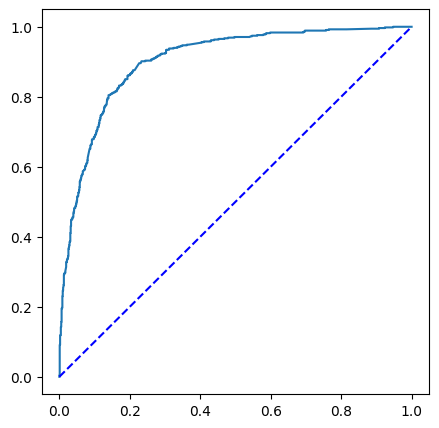

In [184]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'b--')
plt.show()

The baseline makes it easier to see how far the ROC curve of our model is from that of a random model. The top-left corner(0,1) is the "ideal spot": the closer our models get to it, the better.



In [198]:
test_dict = test_X[cat+numerical].to_dict(orient='records')

In [199]:
test_dict[0]

{'what_is_your_current_occupation': 'Unemployed',
 'last_activity': 'Email Link Clicked',
 'lead_profile': 'Potential Lead',
 'last_notable_activity': 'Modified',
 'lead_source': 'Reference',
 'what_matters_most_to_you_in_choosing_a_course': 'Better Career Prospects',
 'lead_origin': 'Lead Add Form',
 'specialization': 'Services Excellence',
 'do_not_email': 'No',
 'totalvisits': 0.0,
 'total_time_spent_on_website': 0,
 'page_views_per_visit': 0.0}

In [200]:
X_test = dv.transform(test_dict)
X_test[0]

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0.])

In [202]:
preds_test = model.predict_proba(X_test)

In [203]:
preds_test = preds_test[:,1]

In [204]:
preds_test[:5]

array([0.91357478, 0.94192033, 0.42643078, 0.13098676, 0.82926676])

In [205]:
pred_test =  (preds_test>0.5).astype(int).reshape(-1,1)

In [206]:
pred_test[:5]

array([[1],
       [1],
       [0],
       [0],
       [1]])

In [207]:
(pred_test==test_y).mean()

0.8392857142857143

Here, there is also 84% accuray of our model

In [208]:
t = 0.4

predict_convert_t = (preds_test>=t).reshape(-1,1)
predict_no_convert_t = (preds_test<t).reshape(-1,1)

actual_convert_t = (test_y==1)
actual_no_convert_t = (test_y==0)

true_positive_t = (predict_convert_t & actual_convert_t).sum()
true_negative_t = (predict_no_convert_t & actual_no_convert_t).sum()

false_positive_t = (predict_convert_t & actual_no_convert_t).sum()
false_negative_t = (predict_no_convert_t & actual_convert_t).sum()

In [209]:
confussion_table_t = np.array([[true_negative_t, false_positive_t],[false_negative_t,true_positive_t]])
print(f'Confussion Table:\n{confussion_table_t}')

Confussion Table:
[[949 170]
 [138 591]]


In [210]:
confussion_table_t/confussion_table_t.sum()

array([[0.51352814, 0.09199134],
       [0.07467532, 0.31980519]])

In [212]:
P_t = true_positive_t/(true_positive_t+false_positive_t)
R_t = true_positive_t/(true_positive_t+false_negative_t)
print(f'Precision: {P_t}\nRecall: {R_t}')

Precision: 0.7766097240473062
Recall: 0.8106995884773662


In [214]:
fpr_t, tpr_t, thresholds_t = roc_curve(test_y, preds_test.reshape(-1,1))

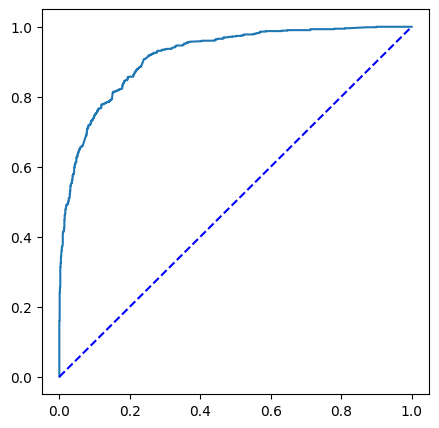

In [215]:
plt.figure(figsize=(5,5))
plt.plot(fpr_t,tpr_t)
plt.plot([0,1],[0,1], 'b--')
plt.show()